<a href="https://colab.research.google.com/github/leehyunggeunkeun/pytorch-study/blob/master/Edwith/3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#edwith 부스트코스 파이토치 강의를 보면서 필사하고 느낀점 및 방법들을 까먹지 않게 정리함...
#출처 edwith 부스트 코스 pytorch 강의

라이브러리 가져오기

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision.datasets as dsets
import torchvision.transforms as transforms

from torch.utils.data import DataLoader,Dataset

import torch.nn.init

gpu 사용설정 seed설정

In [0]:
device='cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1)
if device=='cuda':
    torch.cuda.manual_seed_all(1)
    print(device,torch.cuda.is_available())

cuda True


학습에 사용되는 parameter 설정

In [0]:
lr=0.001
training_epochs=15
batch_size=100

데이터셋 가져오고 loader 만들기

In [0]:
mnist_train=dsets.MNIST(root='MNIST_data/',
                        train=True,
                        transform=transforms.ToTensor(),
                        download=True)

mnist_test=dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

In [0]:
dataloader=DataLoader(dataset=mnist_train,batch_size=batch_size,shuffle=True,drop_last=True)

학습 모델 만들기

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.layer2=nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.fc=nn.Linear(7*7*64,10,bias=True)
        #ReLU함수니까 kaiming he로 초기화 해보자
        
        torch.nn.init.kaiming_uniform_(self.fc.weight)

    def forward(self,x):
        out=self.layer1(x)
        out=self.layer2(out)

        out=out.view(out.size(0),-1)
        out=self.fc(out)
        return out


In [0]:
model=CNN().to(device)

Loss function(criterion) 선택하고 최적화 도구 선택

In [0]:
criterion=nn.CrossEntropyLoss().to(device)
optimizer=optim.Adam(model.parameters(),lr=lr)

모델 학습 및 loss check(criterion의 output)

In [0]:
total_batch=len(dataloader)

for epoch in range(training_epochs+1):
    avg_cost=0

    for x_train,y_train in dataloader:
        x_train=x_train.to(device)
        y_train=y_train.to(device)

        hypothesis=model(x_train)
        cost=criterion(hypothesis,y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost+=cost/total_batch


    print('epoch:{} cost = {}'.format(epoch+1,avg_cost))

epoch:1 cost = 0.219669371843338
epoch:2 cost = 0.059830959886312485
epoch:3 cost = 0.04381280764937401
epoch:4 cost = 0.03537820652127266
epoch:5 cost = 0.029796332120895386
epoch:6 cost = 0.02461753785610199
epoch:7 cost = 0.0211408082395792
epoch:8 cost = 0.01821761205792427
epoch:9 cost = 0.01504435669630766
epoch:10 cost = 0.013120515272021294
epoch:11 cost = 0.011256090365350246
epoch:12 cost = 0.009303014725446701
epoch:13 cost = 0.008710939437150955
epoch:14 cost = 0.007114006672054529
epoch:15 cost = 0.005993535742163658
epoch:16 cost = 0.004749580752104521


학습된 모델의 성능 확인

In [0]:
with torch.no_grad():
    x_test=mnist_test.test_data.view(len(mnist_test),1,28,28).float().to(device)
    y_test=mnist_test.test_labels.to(device)

    prediction=model(x_test)
    correct_prediction=torch.argmax(prediction,1)==y_test
    accuracy=correct_prediction.float().mean()
    print('Accuracy:',100*accuracy.item())

Accuracy: 98.8099992275238


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


나중에 논문작성시 VISDOM 이용하면 편할듯...

ImageFolder
(내가 가진 사진으로 데이터셋 만드는 방법)

In [0]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

from matplotlib.pyplot import imshow

In [0]:
train_data=torchvision.datasets.ImageFolder(root='/content/drive/My Drive/Colab Notebooks/부스트코스/custom_data/origin_data',transform=None)

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFD2F748> 0


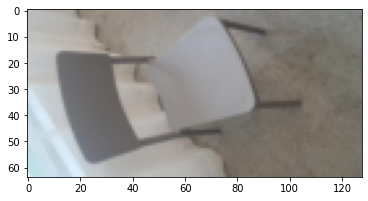

In [0]:
for num, value in enumerate(train_data):
    data,label=value
    print(num, data,label)
    
    imshow(data)
    break

In [0]:
#이미지 크기가 너무 크니까 사이즈를 줄여보자

In [0]:
trans=transforms.Compose([transforms.Resize((64,128))])

In [0]:
train_data=torchvision.datasets.ImageFolder(root='/content/drive/My Drive/Colab Notebooks/부스트코스/custom_data/origin_data',transform=trans)

In [0]:
#그런데 다음에 또 하기 귀찮으니까 아예 전처리 과정을 거쳐서 128*64로 변경하자 

In [0]:
for num, value in enumerate(train_data):
    data,label=value
    print(num, data,label)
    
    if (label==0):
        data.save('/content/drive/My Drive/Colab Notebooks/부스트코스/custom_data/train_data/gray/%d_%d.jpeg'.format(num,label))
    else :
        data.save('/content/drive/My Drive/Colab Notebooks/부스트코스/custom_data/train_data/red/%d_%d.jpeg'.format(num,label))
       

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC024A8> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7E5F8> 0
2 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7E198> 0
3 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7E208> 0
4 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7EBE0> 0
5 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7E390> 0
6 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7EC50> 0
7 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7ED30> 0
8 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7EF60> 0
9 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7ED68> 0
10 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7EB00> 0
11 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7EE48> 0
12 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7EF98> 0
13 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FFC7EDA0> 0
14 <PIL.Image.Image image mode=RGB size=128x64 at 0x7F14FF

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [0]:
device='cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1)
if device=='cuda':
    torch.cuda.manual_seed_all(1)
    print(device,torch.cuda.is_available())

cuda True


In [0]:
trans=transforms.Compose([
                          transforms.ToTensor()
])
#ImageFolder는 mnist를 예시로하면 0번 폴더에는 0만 1번 폴더에는 1만 이런식으로 정렬되어 있을때 사용가능
train_data=torchvision.datasets.ImageFolder(root='/content/drive/My Drive/Colab Notebooks/부스트코스/custom_data/train_data',transform=trans)

#train data를 밸리데이션 으로 나누자!!

In [0]:
train_val_ratio = 0.8
train_size = int(len(train_data) * train_val_ratio)
val_size = len(train_data) - train_size

# train set와 validation set로 나누자

train_dataset, val_dataset = torch.utils.data.random_split(train_data, [train_size, val_size])
print(len(train_dataset), len(val_dataset))

442 111


In [0]:
train_dataloader=DataLoader(dataset=train_dataset,batch_size=8,shuffle=True,num_workers=2)
val_dataloader=DataLoader(dataset=val_dataset,batch_size=8,shuffle=True,num_workers=2)

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.layer2=nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
 
        self.fc=nn.Sequential(
            nn.Linear(16*13*29,120),    #fc1
            nn.ReLU(),
            nn.Linear(120,2)            #fc2
        )

        

    def forward(self,x):
        out=self.layer1(x)
        out=self.layer2(out)

        out=out.view(out.size(0),-1)
        out=self.fc(out)
        return out


In [0]:
model=CNN().to(device)

In [0]:
optimizer=optim.Adam(model.parameters(),lr=0.00005)
loss=nn.CrossEntropyLoss().to(device)

In [0]:
total_batch=len(train_dataloader)+len(val_dataloader)
train_losses = []
val_losses = []
epochs=15

for epoch in range(epochs+1):
    avg_cost=0
    for num,data in enumerate(train_dataloader):
        imgs,labels=data
        imgs=imgs.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()
        hypothesis=model(imgs)
        cost=loss(hypothesis,labels)
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())


        avg_cost += cost/total_batch

    print('epoch:{} cost= {}'.format(epoch+1,avg_cost))

    for num,data in enumerate(val_dataloader):
        imgs,labels=data
        imgs=imgs.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()
        hypothesis=model(imgs)
        cost=loss(hypothesis,labels)
        cost.backward()
        optimizer.step()
        val_losses.append(cost.item())


        avg_cost += cost/total_batch

    print('epoch:{} cost= {}'.format(epoch+1,avg_cost))
    print('-'*50)

epoch:1 cost= 0.00372397736646235
epoch:1 cost= 0.004083558451384306
--------------------------------------------------
epoch:2 cost= 0.0015204366063699126
epoch:2 cost= 0.0016787548083811998
--------------------------------------------------
epoch:3 cost= 0.0007155410130508244
epoch:3 cost= 0.0007835220312699676
--------------------------------------------------
epoch:4 cost= 0.0005313912988640368
epoch:4 cost= 0.0005781351937912405
--------------------------------------------------
epoch:5 cost= 0.0003118894819635898
epoch:5 cost= 0.0003464850306045264
--------------------------------------------------
epoch:6 cost= 0.00021791437757201493
epoch:6 cost= 0.0002506502205505967
--------------------------------------------------
epoch:7 cost= 0.0001717169361654669
epoch:7 cost= 0.00019198597874492407
--------------------------------------------------
epoch:8 cost= 0.0001298372371820733
epoch:8 cost= 0.0001527233689557761
--------------------------------------------------
epoch:9 cost= 9.8

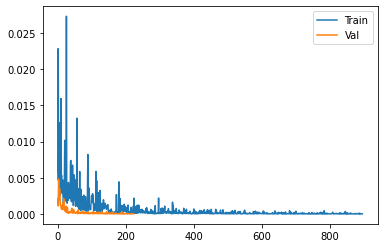

In [0]:
import matplotlib.pyplot as plt

plt.plot(train_losses,label='Train')
plt.plot(val_losses,label='Val')
plt.legend()
plt.show()

In [0]:
# 학습시킨 결과물 저장하고 불러오기

In [0]:
torch.save(model.state_dict(),'/content/drive/My Drive/Colab Notebooks/부스트코스/custom_data/train_data/model.pth')

In [0]:
new_model=CNN().to(device)

In [0]:
new_model.load_state_dict(torch.load('/content/drive/My Drive/Colab Notebooks/부스트코스/custom_data/train_data/model.pth'))

<All keys matched successfully>

평가하기

In [0]:
trans=transforms.Compose([
                          transforms.Resize((64,128)),
                          transforms.ToTensor()
])
test_data=torchvision.datasets.ImageFolder(root='/content/drive/My Drive/Colab Notebooks/부스트코스/custom_data/test_data',transform=trans)

In [0]:
test_dataloader=DataLoader(dataset=test_data,batch_size=len(test_data))

In [0]:
with torch.no_grad():
    for num,data in enumerate(test_dataloader):
        imgs,labels=data
        imgs=imgs.to(device)
        labels=labels.to(device)

        prediction=model(imgs)
        correct_prediction=torch.argmax(prediction,1)==label
        accuracy=correct_prediction.float().mean()
        
        print('Accuracy : ',accuracy.item())



Accuracy :  0.41999998688697815


VGG

In [0]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo

In [0]:

__all__ = [
    'VGG', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn',
    'vgg19_bn', 'vgg19',
]


model_urls = {
    'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
    'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
    'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
    'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
    'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
    'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
    'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
    'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
}

In [0]:
class VGG(nn.Module):
    def __init__(self, features, num_classes=1000, init_weights=True):
        super().__init__()
        
        self.features = features #convolution
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        #우리가 하고자 하는 이미지에 따라 변경해야함...
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )#FC layer
        
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x) #Convolution 
        x = self.avgpool(x) # avgpool
        x = x.view(x.size(0), -1) #
        x = self.classifier(x) #FC layer
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [0]:
def make_layers(cfg, batch_norm=False):   #이게 features
    layers = []
    in_channels = 3
    
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
                     
    return nn.Sequential(*layers)

In [0]:
cfg = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], #8 + 3 =11 == vgg11
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], # 10 + 3 = vgg 13
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'], #13 + 3 = vgg 16
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'], # 16 +3 =vgg 19
    'custom' : [64,64,64,'M',128,128,128,'M',256,256,256,'M']
}

In [0]:
conv = make_layers(cfg['custom'], batch_norm=True)

In [0]:
CNN = VGG(make_layers(cfg['custom']), num_classes=10, init_weights=True)  #만약 커스텀으로 레이어 쌓고 우리가 하려는 모델의 클래스가 10개라면 이렇게

In [0]:
CNN

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), paddin

In [0]:
import torchvision.models.vgg as vgg

vgg for cifar10

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [0]:
def loss_tracker(loss_plot, loss_value, num):
    '''num, loss_value, are Tensor'''
    vis.line(X=num,
             Y=loss_value,
             win = loss_plot,
             update='append'
             )

In [0]:
device ='cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed_all(1)

In [0]:
trans=transforms.Compose([
                          transforms.ToTensor(),
                          transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)) #이미지를 정규화                        
])


trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=trans)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=trans)


trainloader=DataLoader(trainset,batch_size=512,shuffle=True,num_workers=4)
testloader=DataLoader(testset,batch_size=4,shuffle=False,num_workers=4)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import torchvision.models.vgg as vgg

In [0]:
cfg=[32,32,'M',64,64,128,128,128,'M',256,256,256,512,512,512,'M']  #13개

#처음 32에서 max pool 3번거치면 32 16 8 4 따라서 4*4

In [0]:
class VGG(nn.Module):

    def __init__(self, features, num_classes=1000, init_weights=True):
        super().__init__()
        self.features = features
        #self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(        #13+3=vgg16
            nn.Linear(512 * 4 * 4, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        #x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [0]:
model=VGG(vgg.make_layers(cfg),10,True).to(device)

In [0]:
criterion=nn.CrossEntropyLoss().to(device)
optimizer=optim.SGD(model.parameters(),lr=0.005)

In [0]:
epochs=5
train_losses=[]
total_batch=len(trainloader)

for epoch in range(epochs+1):
    avg_cost=0
    
    for i ,data in enumerate(trainloader):
        inputs,labels =data
        inputs=inputs.to(device)
        labels=labels.to(device)

        optimizer.zero_grad()
        hypothesis=model(inputs)
        cost=criterion(hypothesis,labels)
        cost.backward()
        optimizer.step()

        train_losses.append(cost.item())


        avg_cost += cost/total_batch

    print('epoch:{} cost= {}'.format(epoch+1,avg_cost))

epoch:1 cost= 2.3005833625793457
epoch:2 cost= 2.2996773719787598
epoch:3 cost= 2.2983219623565674
epoch:4 cost= 2.2958245277404785
epoch:5 cost= 2.2911105155944824
epoch:6 cost= 2.279895544052124


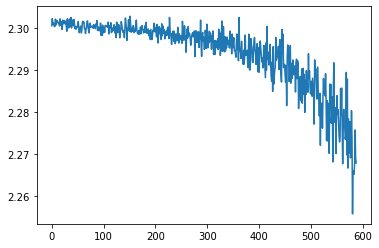

In [0]:
import matplotlib.pyplot as plt
plt.plot(train_losses)
plt.show()

In [0]:
correct=0
total=0

with torch.no_grad():
    for i ,data in enumerate(trainloader):
        inputs,labels =data
        inputs=inputs.to(device)
        labels=labels.to(device)
        hypothesis=model(inputs)

        _,predicted=torch.max(hypothesis.data,1)

        total += labels.size(0)
        correct += (predicted==labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 13 %
